In [38]:
#importation des documents
import pandas as pd

filename='C:/Users/alaed/Downloads/emines/option/datasets/advertising.csv'
df=pd.read_csv(filename)

In [ ]:
df

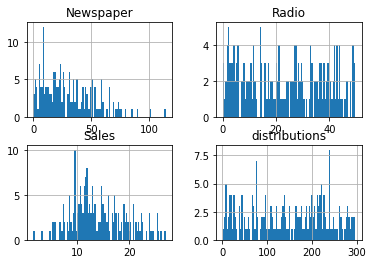

In [43]:
#distribution des variables
    
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(bins = 100)
plt.title('distributions')
plt.show()

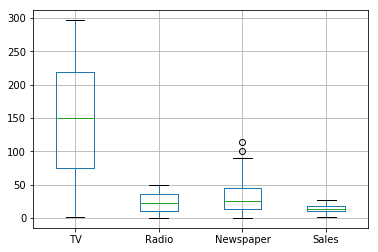

In [47]:
#outliers
df.boxplot()
#il s'avére que NEwspaper contient des outliers

In [54]:
import numpy as np

np.percentile(df.Newspaper, 99.5)

100.96549999999995

In [63]:
condition=df.Newspaper<100

(198, 4)

In [67]:
df = df[condition]
df.shape

(198, 4)

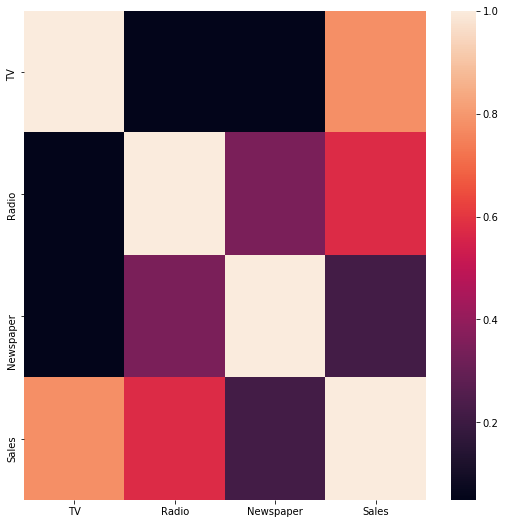

In [69]:
#la colleration entre les variables
import seaborn as sns
corr = df.corr()
fig, ax = plt.subplots(1,1, figsize = (9,9))
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

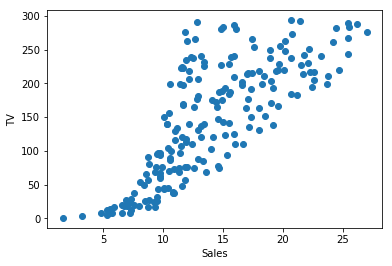

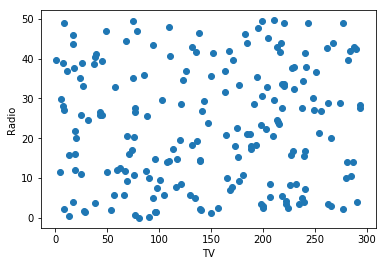

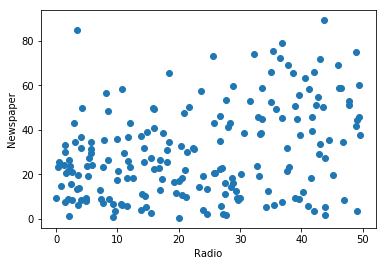

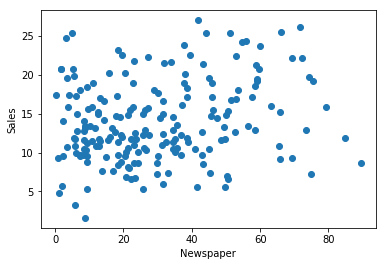

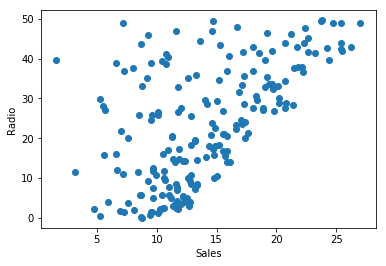

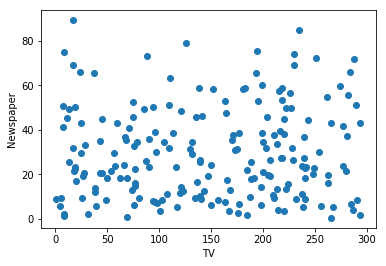

In [93]:
for i in range(-1,3):
    fogure=plt.figure()
    plt.scatter(df.iloc[:,i],df.iloc[:,i+1])
    plt.xlabel('{}'.format(df.columns[i]))
    plt.ylabel('{}'.format(df.columns[i+1]))
for i in range(-1,1):
    fogure=plt.figure()
    plt.scatter(df.iloc[:,i],df.iloc[:,i+2])
    plt.xlabel('{}'.format(df.columns[i]))
    plt.ylabel('{}'.format(df.columns[i+2]))
    

In [95]:
# partie 2

In [114]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula='Sales ~ Radio ', data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     97.69
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           5.99e-19
Time:                        14:49:06   Log-Likelihood:                -566.70
No. Observations:                 198   AIC:                             1137.
Df Residuals:                     196   BIC:                             1144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3166      0.560     16.622      0.000       8.211      10.422
Radio          0.2016      0.020      9.884      0.000       0.161       0.242
==============================================================================
Omnibus:                       20.193   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.115
Skew:                          -0.785   Prob(JB):                     9.56e-06
Kurtosis:                       3.582   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula='Sales ~ Newspaper ', data=df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     9.927
Date:                Wed, 26 Sep 2018   Prob (F-statistic):            0.00188
Time:                        14:49:23   Log-Likelihood:                -601.84
No. Observations:                 198   AIC:                             1208.
Df Residuals:                     196   BIC:                             1214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3193      0.639     19.274      0.000      11.059      13.580
Newspaper      0.0558      0.018      3.151      0.002       0.021       0.091
==============================================================================
Omnibus:                        5.835   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.303
Skew:                           0.333   Prob(JB):                       0.0706
Kurtosis:                       2.555   Cond. No.                         63.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
import statsmodels.formula.api as smf
lm3 = smf.ols(formula='Sales ~ TV ', data=df).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     302.8
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           1.29e-41
Time:                        14:49:36   Log-Likelihood:                -514.27
No. Observations:                 198   AIC:                             1033.
Df Residuals:                     196   BIC:                             1039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0306      0.462     15.219      0.000       6.120       7.942
TV             0.0474      0.003     17.400      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.551
Skew:                          -0.062   Prob(JB):                        0.759
Kurtosis:                       2.774   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
#le meilleur modèle en fnction de 

#R^2 ::est TV  (0.6)

#coefficient :: est Radio (0.2)

#p values :: est TV

#MSE
from sklearn.metrics import mean_squared_error

mse1 = mean_squared_error(df.Sales, lm1.fittedvalues)
mse2 = mean_squared_error(df.Sales, lm2.fittedvalues)
mse3 = mean_squared_error(df.Sales, lm3.fittedvalues)
print(mse1)
print(mse2)
print(mse3)
#MSE ::: est TV

# Le coefficient de la regression Sales ~ Radio est plus petit que le coefficient de la regression Sales ~ TV alors que TV est plus corrélé à Sales que Radio, comment expliquer cela ?
# ils ne sont pas normés


17.92739240698973
25.56815191417739
10.556397575263253


In [131]:
#Comment modifier les données pour que le coefficient de la regression linéaire reflete l'importance de la variable par rapport aux autres.
#par normaliser les données

df.TV=df.TV/df.TV.max()
df.Radio=df.Radio/df.Radio.max()
df.Newspaper=df.Newspaper/df.Newspaper.max()

In [138]:
#Dans le modele Sales ~ TV que représente l'intercept ? 
#il représente ce que Sales vont etre si , on a pas utilisé le TV

#Si le budget TV est nul, combien d'unité de Sales seront quand meme vendu [95% interval] ?
# egale à lintercept =7

In [ ]:
#part 3

In [147]:
lm = smf.ols(formula='Sales ~ TV+Radio+Newspaper ', data=df).fit()
lm.summary()
#matintennat , le modèle est plus significatif

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           8.35e-95
Time:                        15:39:53   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9523      0.318      9.280      0.000       2.325       3.580
TV            13.4147      0.415     32.293      0.000      12.595      14.234
Radio          9.3521      0.430     21.772      0.000       8.505      10.199
Newspaper     -0.1053      0.563     -0.187      0.852      -1.215       1.005
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         6.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
#Si vous augmentez de 50 les sommes allouées au média TV, de combien augmentent les ventes.
#le coefficient de Tv est 13.4147
13.4147*50

670.735

In [143]:
#Comment expliquer que le coefficient pour Newspaper est presque nul,
#car NEwspaper n'est oas significatif dans la prédiction de Sales

#légérement négatif, dans le modèle complet tandis qu'il est positif lorsque pris en compte individuellement ?
#car il est en corrélation avec les autres variables, ils l'ont affécté

In [150]:
#Est ce que enlever la variable Newspaper améliore le modèle ? Au niveau R^2, R^2_adj et MSE ?
lm0 = smf.ols(formula='Sales ~ TV+Radio ', data=df).fit()
lm0.summary()

#R^2 ,R_2_adj et MSE :: n'ont pas changé
mse = mean_squared_error(df.Sales, lm.fittedvalues)
mse0 = mean_squared_error(df.Sales, lm0.fittedvalues)
print(mse)
print(mse0)

2.810099176817413
2.8106062513305865


In [153]:
lm8 = smf.ols(formula='Sales ~ TV+Radio+ TV*Radio ', data=df).fit()
lm8.summary()
#peut être que si une personne voit une publicité dans Tv plus une radio il est plus probable qu'il achete ,
#donc on a intêret à investir dans les deux 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1934.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):          3.19e-144
Time:                        15:41:31   Log-Likelihood:                -267.07
No. Observations:                 198   AIC:                             542.1
Df Residuals:                     194   BIC:                             555.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7577      0.247     27.304      0.000       6.270       7.246
TV             5.5919      0.441     12.682      0.000       4.722       6.462
Radio          1.3688      0.443      3.089      0.002       0.495       2.243
TV:Radio      15.9617      0.767     20.817      0.000      14.449      17.474
==============================================================================
Omnibus:                      126.182   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1151.060
Skew:                          -2.306   Prob(JB):                    1.12e-250
Kurtosis:                      13.875   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""